In [1]:
import os
import glob

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_onsd_ar_inference import ARGUS_onsd_ar_inference
from ARGUS_onsd_roi_inference import ARGUS_onsd_roi_inference

In [2]:
onsd_ar = ARGUS_onsd_ar_inference(config_file_name="../ARGUS/ARGUS_onsd_ar.cfg", network_name="final", device_num=0)
onsd_roi = ARGUS_onsd_roi_inference()

In [3]:
onsd_ar_best_models = [[0,5], [1,8], [2,5]]
onsd_ar.num_models = len(onsd_ar_best_models)

for i,r in enumerate(onsd_ar_best_models):
    model_name = os.path.join("Results", "onsd_vfold_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    onsd_ar.load_model(i, model_name)

In [4]:
#vids = glob.glob("./Data_ONSD/original/Positives/*/*mp4")
#vids = glob.glob("./Data_ONSD/original/Negatives/*/*mp4")
#vids = ["../ARGUS/Data/onsd.mp4"]
vids = glob.glob("./Test_Data/*mp4")
           
vid = ARGUS_load_video(vids[0])
print(vids[0])

./Test_Data\10. 235.1 Left Long_Video.mp4


In [5]:
print(vid.shape)

(288, 1080, 912)


In [6]:
onsd_ar.volume_preprocess(vid)

In [7]:
img = onsd_ar.input_image
img_size = img.GetLargestPossibleRegion().GetSize()

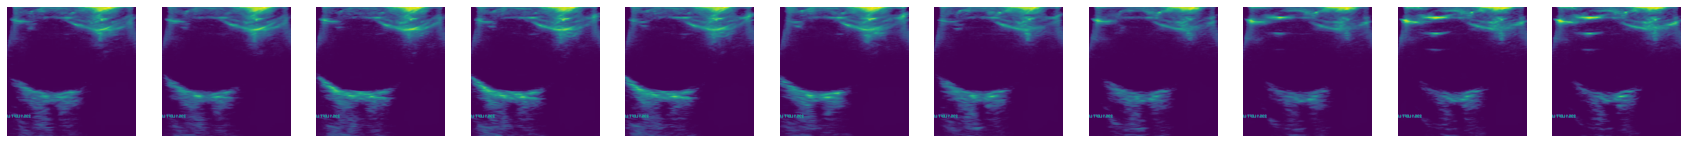

In [8]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

num_slices = img.shape[0]
plt.figure(figsize=[30, 30])
step = num_slices//10
for c in range(0,num_slices,step):
    plt.subplot(
        1,
        11,
        c//step + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(img[c, :, :],270))
plt.show()

In [9]:
labels = onsd_ar.volume_inference()

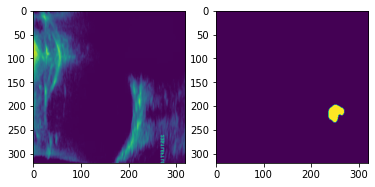

In [10]:
plt.subplot(1,2,1)
plt.imshow(img[120])
#(np.mean(labels,axis=0)))
plt.subplot(1,2,2)
plt.imshow((labels[120]))

In [11]:
classification, width, min_l, max_l = onsd_roi.inference(img, labels)

In [12]:
print(classification, width, min_l, max_l)

0 [4.170683343502135, 0.23350707287247807] [87 49] [89 65]


./Test_Data\10. 235.1 Left Long_Video.mp4
0 [4.170683343502135, 0.23350707287247807] [87 49] [89 65]


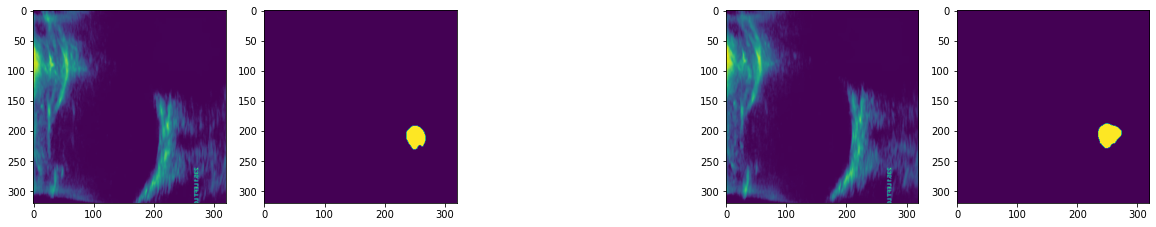


./Test_Data\11. 234.1 Left Long_Video (Mislabeled).mp4
0 [5.216810344827587, 0.11650101398591359] [149 154] [170 170]


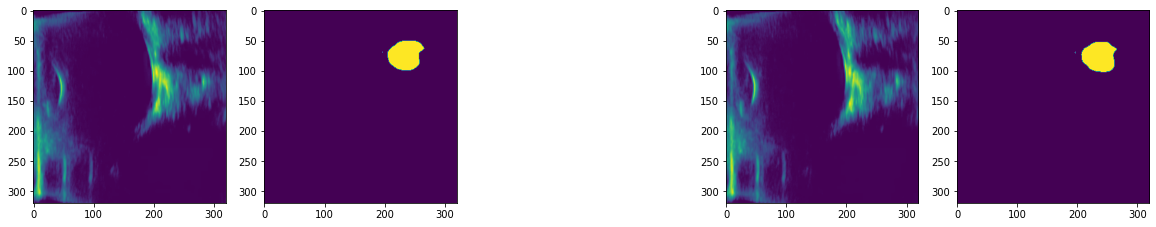


./Test_Data\11. 30.1 Left Long_Video.mp4
1 [5.974222086638194, 0.10018667800723433] [209  74] [230  95]


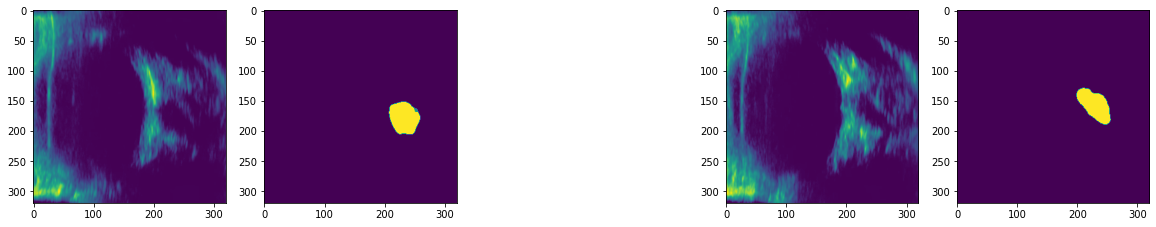


./Test_Data\11. 47.1 Left Long_Video.mp4
1 [5.748779743746186, 0.42920747305022444] [259 259] [275 275]


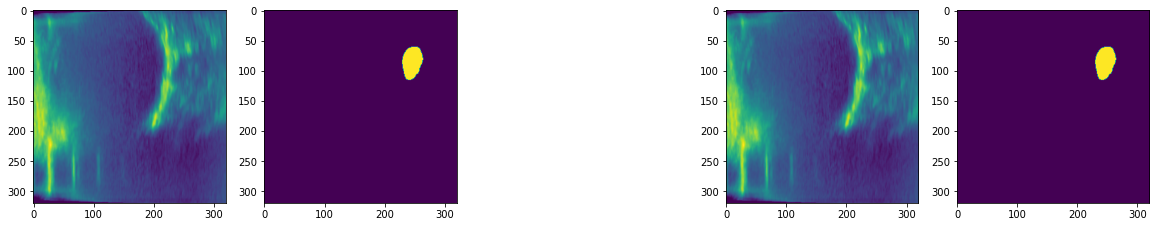


./Test_Data\2. 101.1 Right Lat_Video.mp4
1 [5.6489816700611, 0.21945696858614439] [14 14] [30 25]


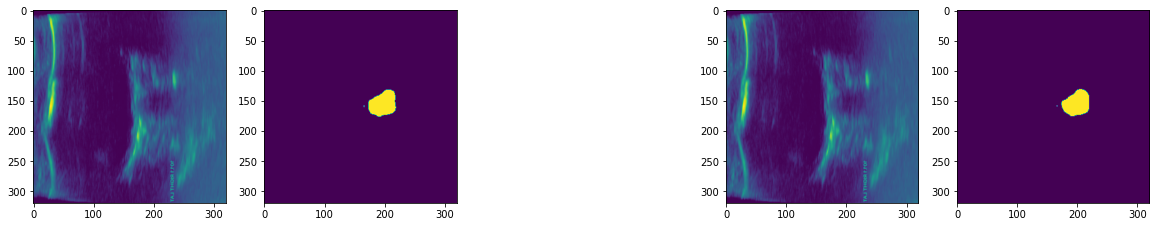


./Test_Data\2. 107.3 Right Lat_Video 1 (MISLABELED).mp4
0 [5.2978950579621715, 0.10155691739978596] [74 89] [ 90 105]


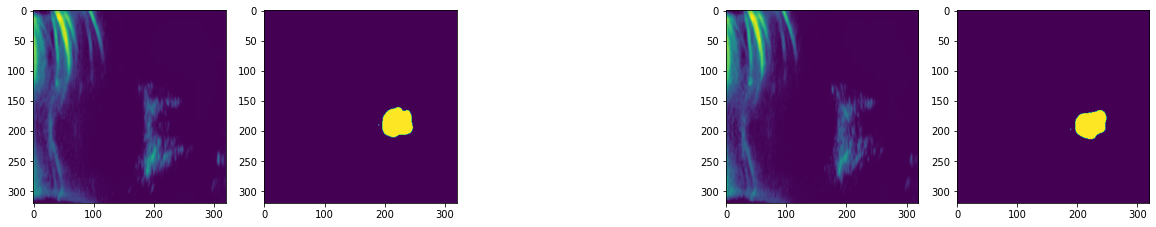


./Test_Data\2. 136.1 Right Lat_Video.mp4
1 [6.4251067724222075, 0.2665819302906379] [254 154] [265 170]


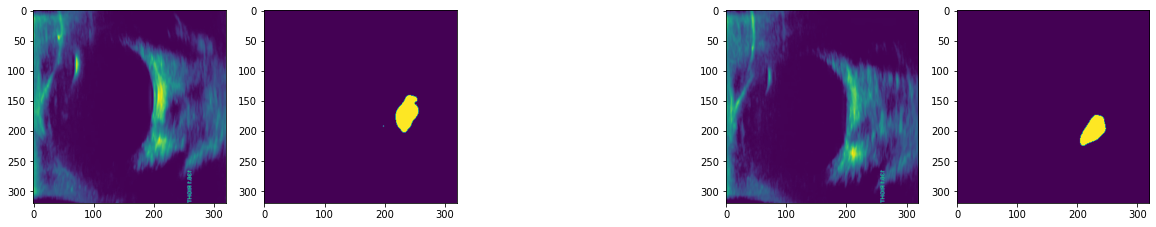


./Test_Data\2. 177.2 Right Lat_Video 1.mp4
0 [4.847010372178157, 0.15638422575928435] [309 259] [320 275]


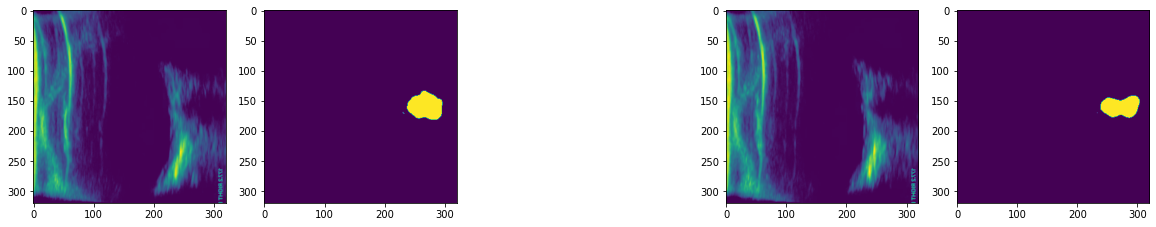


./Test_Data\2. 209.1 Right_Lat_Video 1.mp4
1 [7.552318486882244, 0.6961574922841981] [64 39] [85 50]


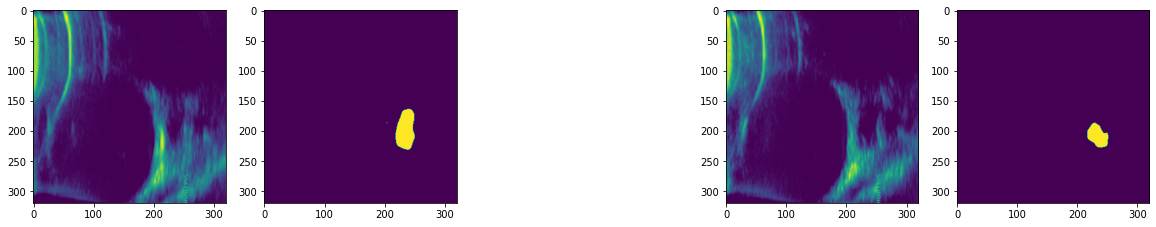


./Test_Data\3. 128.1 Right Long_Video.mp4
0 [3.3816351433801093, 0.11881854743056909] [231 231] [233 233]


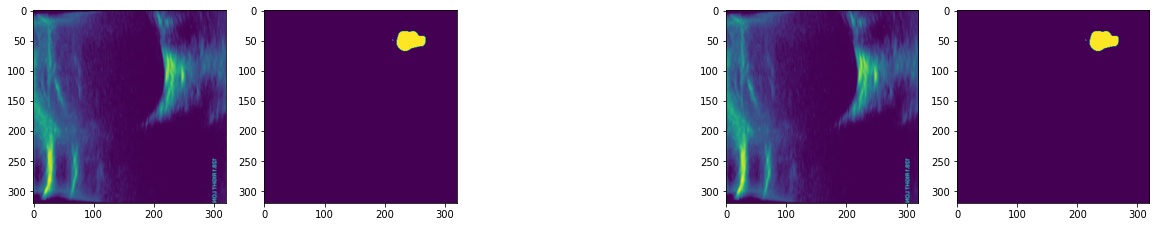


./Test_Data\3. 22.1 Right Long_Video.mp4
0 [4.9597315436241605, 0.270930062957092] [74 79] [95 95]


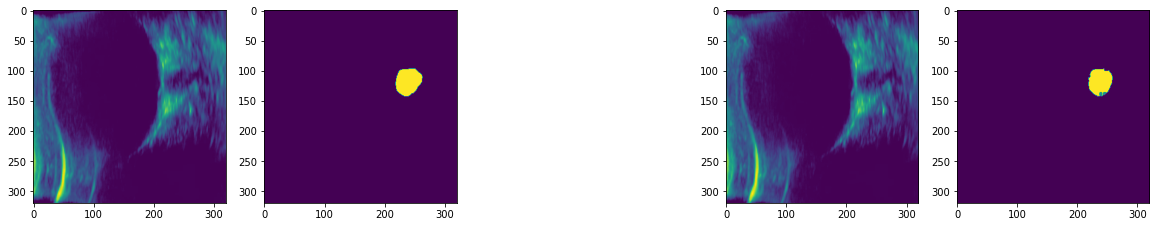


./Test_Data\3. 234.1 Right Lat_Video.mp4
0 [5.433499357326479, 0.13480111290337657] [343 367] [355 369]


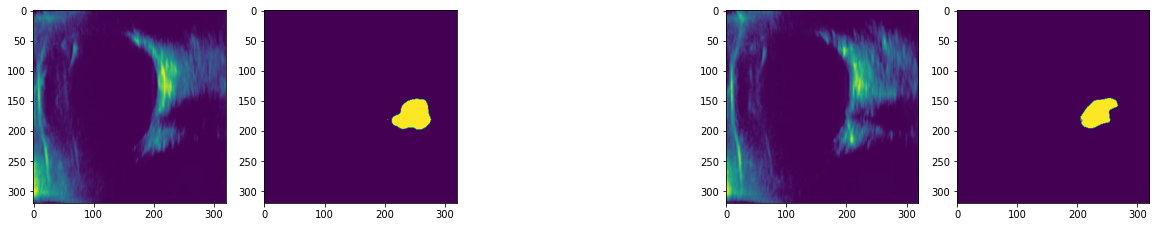


./Test_Data\4. 136.1 Right Long_Video.mp4
1 [6.650549115314215, 0.20179354601018382] [239 259] [250 270]


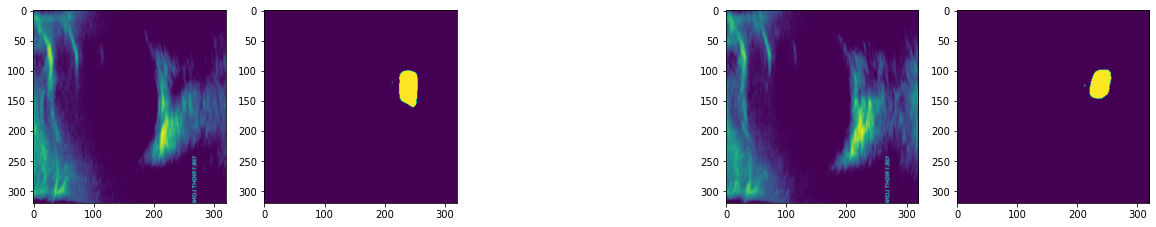


./Test_Data\4. 193.1 Right Long_Video 1.mp4
1 [6.650549115314215, 0.13765154590159012] [234 229] [250 240]


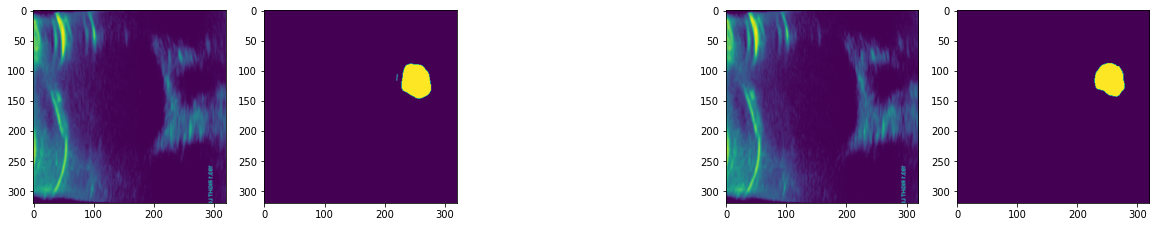


./Test_Data\4. 205.1 Right Long_Video 1.mp4
0 [4.283404514948138, 0.050285177662556885] [69 69] [80 80]


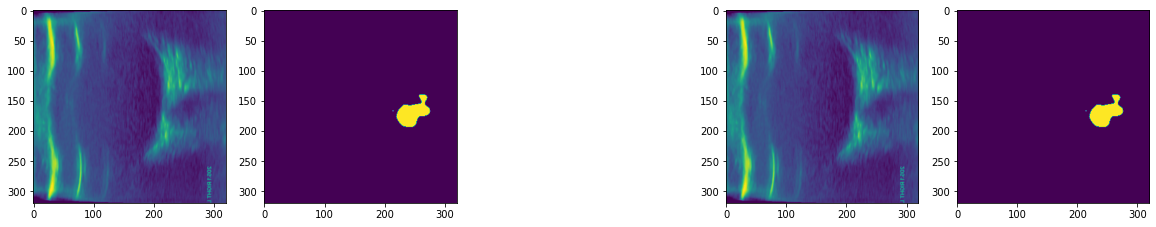


./Test_Data\4. 229.1 Right Long_Video 1.mp4
0 [5.185173886516168, 0.05346550048580582] [14 99] [ 35 110]


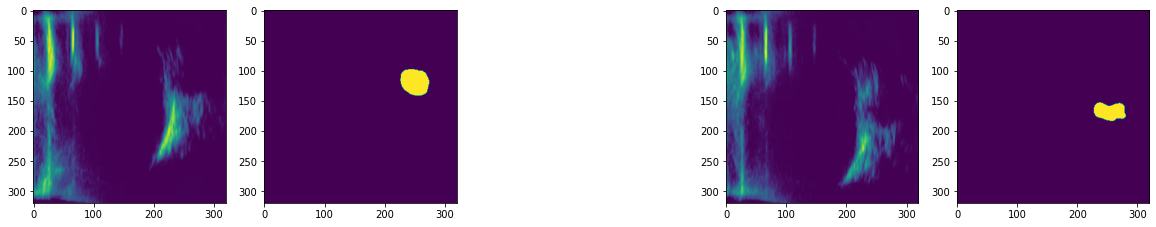


./Test_Data\4. 246.1 Right Long_Video.mp4
1 [6.889002036659877, 0.2308998067191153] [214  19] [225  30]


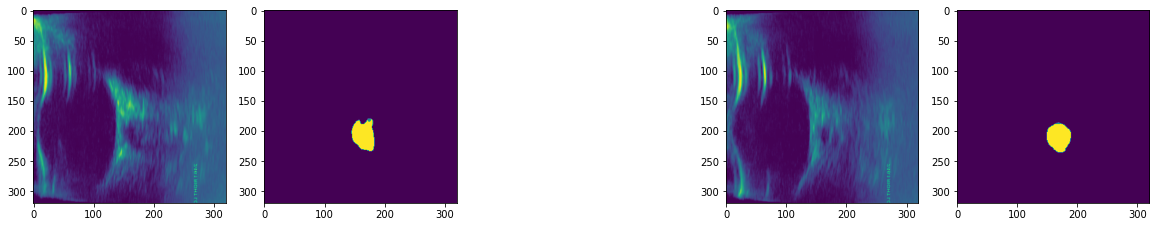


./Test_Data\4. 47.1 Right Lat_Video.mp4
0 [5.003879310344828, 0.09960578683052457] [74 74] [95 95]


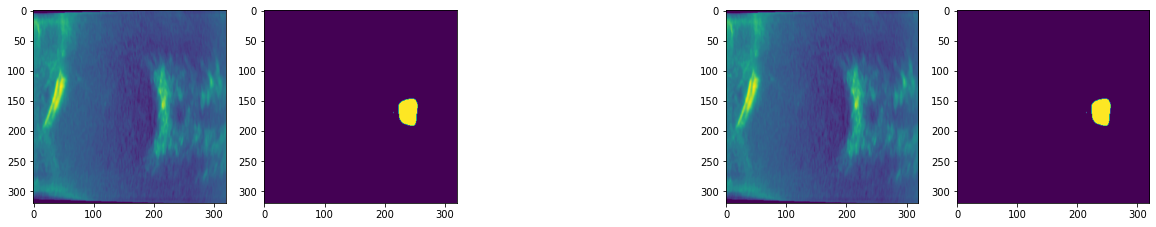


./Test_Data\5. 142.1 Right Long_Video.mp4
0 [5.185173886516168, 0.12080808960628532] [124 159] [140 175]


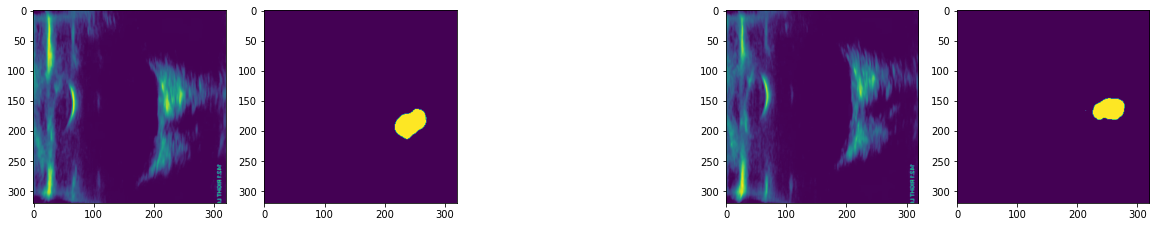


./Test_Data\5. 213.2 Right Long_Video 1.mp4
1 [5.646577763496144, 0.201467260228212] [ 99 144] [115 160]


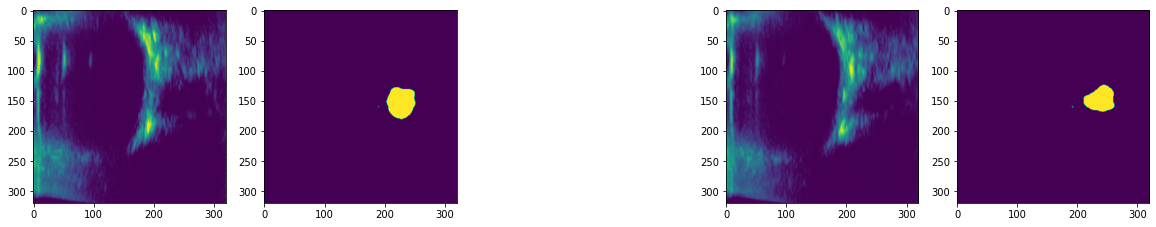


./Test_Data\6. 22.1 Left Lat_Video.mp4
0 [5.2978950579621715, 0.0786024592295157] [134 149] [145 160]


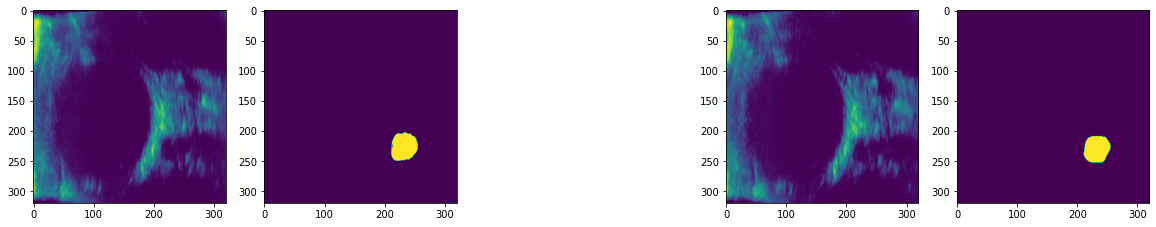


./Test_Data\6. 32.1 Left Lat_Video 1.mp4
1 [6.613441955193482, 0.5932571529126635] [139 229] [155 240]


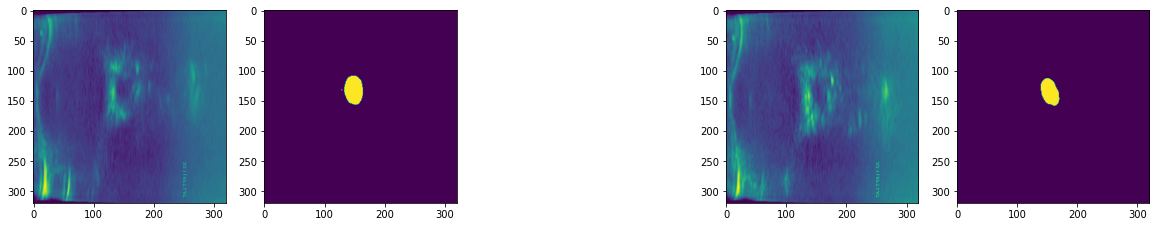


./Test_Data\7. 217.1 Left Long_Video.mp4
1 [7.665039658328248, 0.3921545785917459] [199 154] [215 170]


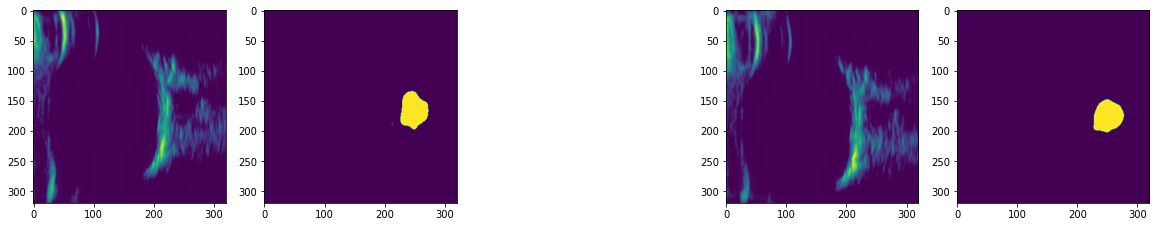


./Test_Data\8. 90.1 Left_Long_Video 1.mp4
0 [2.7053081147040876, 0.28877253278388093] [219 219] [235 235]


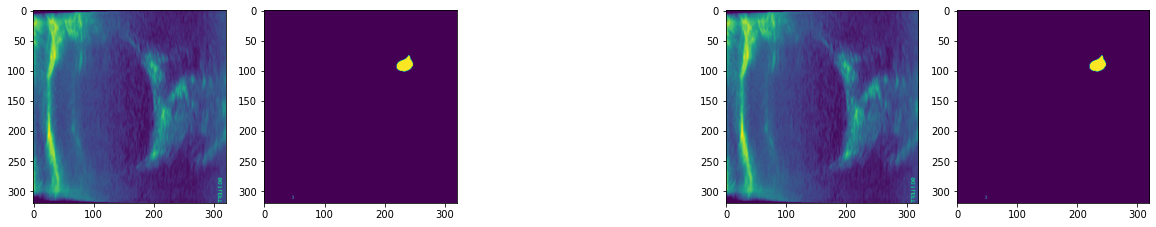

In [13]:
for vid_name in vids:
    print(vid_name)
    vid = ARGUS_load_video(vid_name)
    onsd_ar.volume_preprocess(vid)
    labels = onsd_ar.volume_inference()
    img = onsd_ar.input_image
    classification, width, min_l, max_l = onsd_roi.inference(img, labels)
    print(classification, width, min_l, max_l)
    plt.figure(figsize=(20,5))
    for i in range(len(min_l)):
        plt.subplot(1,3*len(min_l)-1,3*i+1)
        plt.imshow(img[(min_l[i]+max_l[i])//2])
        plt.subplot(1,3*len(min_l)-1,3*i+2)
        plt.imshow((labels[(min_l[i]+max_l[i])//2]))
    plt.show()
    print("")